# Prediction of Happy Customers

### Background

We are one of the fastest growing startups in the logistics and delivery domain. We work with several partners and make on-demand delivery to our customers. During the COVID-19 pandemic, we are facing several different challenges and everyday we are trying to address these challenges.

We thrive on making our customers happy. As a growing startup, with a global expansion strategy we know that we need to make our customers happy and the only way to do that is to measure how happy each customer is. If we can predict what makes our customers happy or unhappy, we can then take necessary actions.

Getting feedback from customers is not easy either, but we do our best to get constant feedback from our customers. This is a crucial function to improve our operations across all levels.

We recently did a survey to a select customer cohort. You are presented with a subset of this data. We will be using the remaining data as a private test set.

### Data Description

Y = target attribute (Y) with values indicating 0 (unhappy) and 1 (happy) customers X1 = my order was delivered on time X2 = contents of my order was as I expected X3 = I ordered everything I wanted to order X4 = I paid a good price for my order X5 = I am satisfied with my courier X6 = the app makes ordering easy for me

Attributes X1 to X6 indicate the responses for each question and have values from 1 to 5 where the smaller number indicates less and the higher number indicates more towards the answer

### Goal(s):

Predict if a customer is happy or not based on the answers they give to questions asked.

### Success Metrics:

Reach 73% accuracy score or above, or convince us why your solution is superior. We are definitely interested in every solution and insight you can provide us.

### Bonus(es):

We are very interested in finding which questions/features are more important when predicting a customer’s happiness. Using a feature selection approach show us understand what is the minimal set of attributes/features that would preserve the most information about the problem while increasing predictability of the data we have. Is there any question that we can remove in our next survey?

## Import Libraries and Dataset

In [1]:
# libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [44]:
# data import and display
df = pd.read_csv("ACME-HappinessSurvey2020.csv")

df.head(10)

,Y,X1,X2,X3,X4,X5,X6
0,0,3,3,3,4,2,4
1,0,3,2,3,5,4,3
2,1,5,3,3,3,3,5
3,0,5,4,3,3,3,5
4,0,5,4,3,3,3,5
5,1,5,5,3,5,5,5
6,0,3,1,2,2,1,3
7,1,5,4,4,4,4,5
8,0,4,1,4,4,4,4
9,0,4,4,4,2,5,5


## Exploratory Data Analysis (EDA)

In [3]:
# info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Y       126 non-null    int64
 1   X1      126 non-null    int64
 2   X2      126 non-null    int64
 3   X3      126 non-null    int64
 4   X4      126 non-null    int64
 5   X5      126 non-null    int64
 6   X6      126 non-null    int64
dtypes: int64(7)
memory usage: 7.0 KB


In [45]:
# check for missing values
df.isnull().sum()

Y     0
X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
dtype: int64

In [46]:
# check for duplicated values
df.duplicated().sum()

16

In [7]:
# remove duplicated values
# df.drop_duplicates(inplace=True)
# df.shape

(110, 7)

In [47]:
# check for imbalance
df["Y"].value_counts()

1    69
0    57
Name: Y, dtype: int64

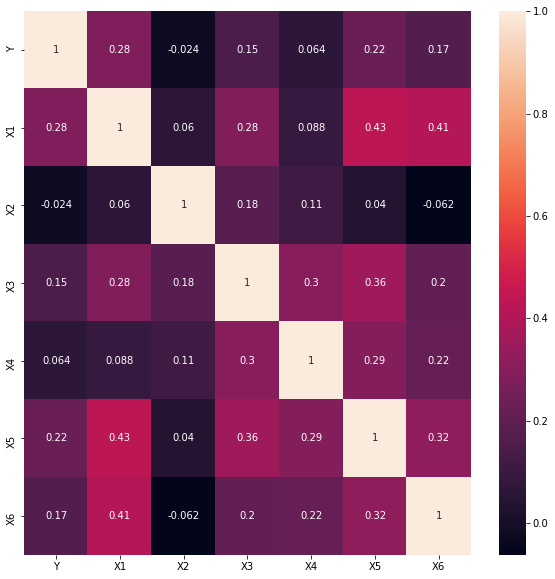

In [48]:
# correlations
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)

 X2 and X4 columns can be droped as they are weakly correlated with the target Y

## Feature Selection and Pre-processing

Based on correlation coefficients, it was found that X2 and X4 are not important features when predicting a customer’s happiness. Therefore, they were removed from the analysis

In [49]:
# labels and targets 
X = df.drop(["Y","X2","X4"], axis=1)   # X2 and X4 columns can be droped as they are weakly correlated with the target
y = df["Y"]

In [50]:
# train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(X.shape, X_train.shape, X_test.shape)

(126, 4) (100, 4) (26, 4)


## ML Analysis

In [51]:
# ML models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.ensemble import GradientBoostingClassifier

# ML evaluation
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

# Linear regression
lrc = LogisticRegression(random_state=42, max_iter=10000)
lrc.fit(X_train, y_train)
lrc_pred = lrc.predict(X_test)

# SVC
svc = SVC(kernel="rbf", probability=True)
svc.fit(X_train, y_train)
svc_pred = svc.predict(X_test)

# Decesion Tree
dtc = DecisionTreeClassifier(random_state=42)
dtc.fit(X_train, y_train)
dtc_pred = dtc.predict(X_test)

# Random Forest
rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)

# XGB Classifier
xgbc = xgb.XGBClassifier()
xgbc.fit(X_train, y_train, verbose=True)
xgbc_pred = xgbc.predict(X_test)

# Gradiend Boosting
gbc = GradientBoostingClassifier(random_state=42)
gbc.fit(X_train, y_train)
gbc_pred = gbc.predict(X_test)


In [52]:
# Logistic regression
print("Accuracy:", accuracy_score(y_test, lrc_pred), "\n")
print("Confusion matrix: ","\n",confusion_matrix(lrc_pred, y_test))

Accuracy: 0.6153846153846154 

Confusion matrix:  
 [[ 4  2]
 [ 8 12]]


In [53]:
# SVC
print("Accuracy:", accuracy_score(y_test, svc_pred), "\n")
print("Confusion matrix: ","\n",confusion_matrix(svc_pred, y_test))

Accuracy: 0.6923076923076923 

Confusion matrix:  
 [[ 8  4]
 [ 4 10]]


In [54]:
# Decesion Tree
print("Accuracy:", accuracy_score(y_test, dtc_pred), "\n")
print("Confusion matrix: ","\n",confusion_matrix(dtc_pred, y_test))

Accuracy: 0.6153846153846154 

Confusion matrix:  
 [[8 6]
 [4 8]]


In [55]:
# Random Forest
print("Accuracy:", accuracy_score(y_test, rfc_pred), "\n")
print("Confusion matrix: ","\n",confusion_matrix(rfc_pred, y_test))

Accuracy: 0.7307692307692307 

Confusion matrix:  
 [[ 7  2]
 [ 5 12]]


In [56]:
# XGB Classifier
print("Accuracy:", accuracy_score(y_test, xgbc_pred), "\n")
print("Confusion matrix: ","\n",confusion_matrix(xgbc_pred, y_test))

Accuracy: 0.6153846153846154 

Confusion matrix:  
 [[7 5]
 [5 9]]


In [57]:
# Gradient Boosting Classifier
print("Accuracy:", accuracy_score(y_test, gbc_pred), "\n")
print("Confusion matrix: ","\n",confusion_matrix(gbc_pred, y_test))

Accuracy: 0.6923076923076923 

Confusion matrix:  
 [[ 7  3]
 [ 5 11]]


## Hyperparameter tuning

### GridSearchCV - Random Forest

In [58]:
# import GridSearchCV
from sklearn.model_selection import GridSearchCV

In [59]:
# parameters for Random Forest
rfc_params = {'n_estimators':[10,15,30,50,70,90,100,110], 
            'min_samples_split':[2,4,8,16],
            'min_samples_leaf':[1,2,3,4,5],
            'max_depth': [None, 1, 2, 3],
            'criterion':["gini", "entropy"]}

In [60]:
# GridSearch CV for Random Forest
rfc_grid = GridSearchCV(estimator=rfc, 
                        param_grid=rfc_params,
                        scoring='accuracy',
                        cv=5,
                        n_jobs=-1,
                        return_train_score=False)

In [61]:
# fit the data to do GridSearchCV
rfc_grid_fit = rfc_grid.fit(X, y)

In [62]:
# get the results of the GridSearchCV
rfc_cv = pd.DataFrame(rfc_grid.cv_results_)
rfc_cv.head(2)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.028127,0.006249,0.009375,0.007654,gini,None,1,2,10,"{'criterion': 'gini', 'max_depth': None, 'min_...",0.615385,0.68,0.64,0.76,0.48,0.635077,0.091744,169
1,0.046875,0.009884,0.003125,0.006251,gini,None,1,2,15,"{'criterion': 'gini', 'max_depth': None, 'min_...",0.615385,0.68,0.64,0.76,0.48,0.635077,0.091744,169


In [63]:
# results from GridSearchCV
rfc_cv[['param_n_estimators', 'param_min_samples_split', 'param_min_samples_leaf', 'mean_test_score']]

,param_n_estimators,param_min_samples_split,param_min_samples_leaf,mean_test_score
0,10,2,1,0.635077
1,15,2,1,0.635077
2,30,2,1,0.667077
3,50,2,1,0.667077
4,70,2,1,0.651077
...,...,...,...,...
1275,50,16,5,0.595077
1276,70,16,5,0.603077
1277,90,16,5,0.603077
1278,100,16,5,0.603077


In [64]:
# best parameters
rfc_grid_fit.best_params_

{'criterion': 'entropy',
 'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100}

In [65]:
# best score
rfc_grid_fit.best_score_

0.6907692307692307

.

### GridSearchCV - Support Vector Classifier (SVC)

In [66]:
# parameters for SVC
svc_params = {'C':[0.01, 0.1, 0.5, 1, 2, 5, 10], 
              'kernel':['rbf', 'linear'], 
              'gamma':[0.0001, 0.001, 0.01, 0.1, 0.25, 0.5, 1, 5]}

In [67]:
# GridSearchCV for SVC
svc_grid = GridSearchCV(estimator=svc, 
                        param_grid=svc_params, 
                        scoring="accuracy", 
                        cv=5, 
                        n_jobs=-1, 
                        return_train_score=False)

In [68]:
# fit the data to do GridSearchCV
svc_grid_fit = svc_grid.fit(X, y)

In [69]:
# get the results of the GridSearchCV
svc_cv = pd.DataFrame(svc_grid.cv_results_)
svc_cv.head(2)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.003398,0.000490,0.001808,0.000403,0.01,0.0001,rbf,"{'C': 0.01, 'gamma': 0.0001, 'kernel': 'rbf'}",0.538462,0.52,0.56,0.56,0.56,0.547692,0.016165,81
1,0.004052,0.003636,0.000207,0.000415,0.01,0.0001,linear,"{'C': 0.01, 'gamma': 0.0001, 'kernel': 'linear'}",0.576923,0.52,0.56,0.56,0.56,0.555385,0.018867,64


In [70]:
# results from GridSearchCV
svc_cv[['param_C', 'param_kernel', 'param_gamma', 'mean_test_score']]

,param_C,param_kernel,param_gamma,mean_test_score
0,0.01,rbf,0.0001,0.547692
1,0.01,linear,0.0001,0.555385
2,0.01,rbf,0.001,0.547692
3,0.01,linear,0.001,0.555385
4,0.01,rbf,0.01,0.547692
...,...,...,...,...
107,10,linear,0.5,0.587385
108,10,rbf,1,0.642769
109,10,linear,1,0.587385
110,10,rbf,5,0.587077


In [71]:
# best parameters
svc_grid_fit.best_params_

{'C': 10, 'gamma': 0.5, 'kernel': 'rbf'}

In [72]:
# best score
svc_grid_fit.best_score_

0.6427692307692309

.

### GridSearchCV - Decision Tree 

In [73]:
# parameters for Decision Tree
dtc_params = {'min_samples_split':[2,3,4,5,8,16,20],
              'min_samples_leaf':[1,2,3,4,5,10],
              'criterion':['gini', 'entropy'],
              'max_depth':[None,2,4,6,8,10,12]}

In [74]:
# GridSearchCV for Decision Tree
dtc_grid = GridSearchCV(estimator=dtc, 
                        param_grid=dtc_params, 
                        scoring="accuracy", 
                        cv=5, 
                        n_jobs=-1, 
                        return_train_score=False)

In [75]:
# fit the data to do GridSearchCV
dtc_grid_fit = dtc_grid.fit(X, y)

In [76]:
# get the results of the GridSearchCV
dtc_cv = pd.DataFrame(dtc_grid.cv_results_)
dtc_cv.head(2)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.002993,0.000632,0.001200,0.000401,gini,None,1,2,"{'criterion': 'gini', 'max_depth': None, 'min_...",0.653846,0.64,0.64,0.72,0.44,0.618769,0.094168,346
1,0.002880,0.000581,0.001104,0.000670,gini,None,1,3,"{'criterion': 'gini', 'max_depth': None, 'min_...",0.653846,0.60,0.64,0.76,0.44,0.618769,0.103863,346


In [77]:
# results from GridSearchCV
dtc_cv[['param_criterion', 'param_max_depth', 'param_min_samples_split', 'param_min_samples_leaf', 'mean_test_score']]

,param_criterion,param_max_depth,param_min_samples_split,param_min_samples_leaf,mean_test_score
0,gini,None,2,1,0.618769
1,gini,None,3,1,0.618769
2,gini,None,4,1,0.619385
3,gini,None,5,1,0.618769
4,gini,None,8,1,0.626769
...,...,...,...,...,...
583,entropy,12,4,10,0.555077
584,entropy,12,5,10,0.555077
585,entropy,12,8,10,0.555077
586,entropy,12,16,10,0.555077


In [78]:
# best parameters
dtc_grid_fit.best_params_

{'criterion': 'entropy',
 'max_depth': None,
 'min_samples_leaf': 3,
 'min_samples_split': 8}

In [79]:
dtc_grid_fit.best_score_

0.7067692307692307

Hyperparameter tuning was applied to selected models. However, it didn't result in accuracy > 73%. 

### Removing additional features

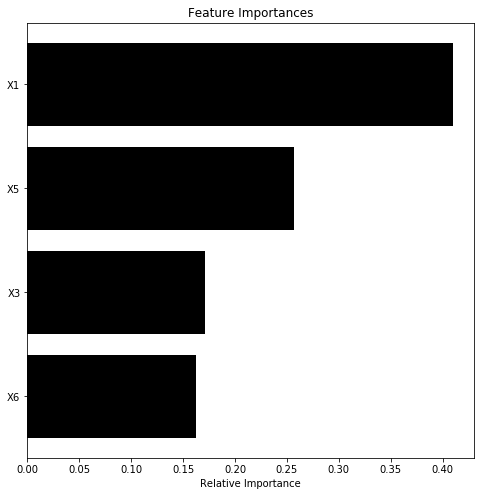

In [82]:
# importance of features in the tree building
feature_names = list(X_train.columns)
importances = dtc_grid_fit.best_estimator_.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="black", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

In [103]:
# drop X3 and X6
X = df.drop(["Y","X2","X4","X3","X6"], axis=1)   # X3 and X6 columns can be also droped

In [104]:
# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(X.shape, X_train.shape, X_test.shape)

(126, 2) (100, 2) (26, 2)


#### RF Classifier

In [116]:
# Random Forest
rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)

print("Accuracy:", accuracy_score(y_test, rfc_pred))

Accuracy: 0.8076923076923077


In [117]:
# checking for Overfitting
rfc_pred2 = rfc.predict(X_train)
print("Accuracy:", accuracy_score(y_train, rfc_pred2))

Accuracy: 0.69


#### SVM Classifier

In [123]:
# SVC
svc = SVC(kernel="rbf", probability=True)
svc.fit(X_train, y_train)
svc_pred = svc.predict(X_test)

print("Accuracy:", accuracy_score(y_test, svc_pred))

Accuracy: 0.7692307692307693


In [124]:
# checking for Overfitting
svc_pred2 = svc.predict(X_train)
print("Accuracy:", accuracy_score(y_train, svc_pred2))

Accuracy: 0.65


#### XGB Classifier

In [121]:
# XGB Classifier
xgbc = xgb.XGBClassifier()
xgbc.fit(X_train, y_train, verbose=True)
xgbc_pred = xgbc.predict(X_test)

print("Accuracy:", accuracy_score(y_test, xgbc_pred))

Accuracy: 0.7692307692307693


In [122]:
# checking for Overfitting
xgbc_pred2 = xgbc.predict(X_train)
print("Accuracy:", accuracy_score(y_train, xgbc_pred2))

Accuracy: 0.69


### Conclusions

According to final results, removing the features such as X2, X4 and X3 and X6 improved the accuracy of ML models. The resulting accuracy in Random forest, SVC, and XGB model are higher than 73%. However, the accuracy of training prediction was lower than the prediction from testing dataset, which can indicate the problem of overfitting. Yet, this can be a result of *limited training data*.

The importance of selected features can be also validated by viewing the label of selected features, where *X1=my order was delivered on time*, and *X5=I am satisfied with my courier*.